# Exploring the deprivation and language 2021 Census datasets

Source:
- https://www.nomisweb.co.uk/datasets/c2021ts011
- https://www.nomisweb.co.uk/datasets/c2021ts025

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
from urllib.request import urlopen
import json

In [3]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Load and join data

### Multiple deprivation

In [5]:
dep = pd.read_csv('deprivation.csv')
dep.head(2)

,2021 super output area - lower layer,mnemonic,Total: All households,%,Household is not deprived in any dimension,%.1,Household is deprived in one dimension,%.2,Household is deprived in two dimensions,%.3,Household is deprived in three dimensions,%.4,Household is deprived in four dimensions,%.5
0,Hartlepool 001A,E01011954,963.0,100.0,389.0,40.4,304.0,31.6,207.0,21.5,62.0,6.4,1.0,0.1
1,Hartlepool 001B,E01011969,603.0,100.0,306.0,50.7,199.0,33.0,89.0,14.8,9.0,1.5,0.0,0.0


In [6]:
# Check if each row is unique
print(len(dep))
print(dep['2021 super output area - lower layer'].nunique())

35679
35672


In [7]:
dep.tail(9)

,2021 super output area - lower layer,mnemonic,Total: All households,%,Household is not deprived in any dimension,%.1,Household is deprived in one dimension,%.2,Household is deprived in two dimensions,%.3,Household is deprived in three dimensions,%.4,Household is deprived in four dimensions,%.5
35670,Merthyr Tydfil 008E,W01001309,518.0,100.0,183.0,35.3,168.0,32.4,128.0,24.7,39.0,7.5,0.0,0.0
35671,Merthyr Tydfil 008F,W01001898,645.0,100.0,278.0,43.1,187.0,29.0,131.0,20.3,45.0,7.0,4.0,0.6
35672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35675,NaN,In order to protect against disclosure of pers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35676,NaN,have been swapped between different geographic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35677,NaN,by small amounts. Small counts at the lowest g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35678,NaN,affected.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Drop last few rows
dep.drop(dep.loc[35672:35678].index,inplace=True)

In [9]:
dep['2021 super output area - lower layer'].nunique()==len(dep)

True

In [10]:
dep.rename(columns={'2021 super output area - lower layer': 'SOA'},inplace=True)

In [11]:
dep.describe()

,Total: All households,%,Household is not deprived in any dimension,%.1,Household is deprived in one dimension,%.2,Household is deprived in two dimensions,%.3,Household is deprived in three dimensions,%.4,Household is deprived in four dimensions,%.5
count,35672.000000,35672.0,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000
mean,694.749299,100.0,335.514465,48.253787,232.468883,33.501396,99.128588,14.281481,26.032519,3.736020,1.604844,0.227024
std,144.022827,0.0,103.466264,10.725164,53.253826,3.747987,43.698057,5.678830,20.848522,2.884089,2.389340,0.328408
min,400.000000,100.0,70.000000,13.300000,81.000000,15.800000,9.000000,1.500000,0.000000,0.000000,0.000000,0.000000
25%,601.000000,100.0,264.000000,40.500000,196.000000,31.200000,66.000000,9.800000,10.000000,1.500000,0.000000,0.000000
50%,665.000000,100.0,325.000000,49.000000,226.000000,33.700000,93.000000,13.500000,20.000000,2.900000,1.000000,0.100000
75%,767.000000,100.0,394.000000,56.300000,261.000000,36.000000,127.000000,18.200000,37.000000,5.400000,2.000000,0.300000
max,1980.000000,100.0,1052.000000,81.000000,723.000000,59.900000,379.000000,37.000000,191.000000,18.500000,35.000000,5.100000


In [12]:
dep.duplicated().sum()

0

### Language

In [13]:
lang = pd.read_csv('lang.csv')
lang.head(5)

,2021 super output area - lower layer,mnemonic,Total: All households,%,"All adults in household have English in England, or English or Welsh in Wales as a main language",%.1,"At least one but not all adults in household have English in England, or English or Welsh in Wales as a main language",%.2,"No adults in household, but at least one person aged 3 to 15 years, has English in England or English or Welsh in Wales as a main language",%.3,"No people in household have English in England, or English or Welsh in Wales as a main language",%.4
0,Hartlepool 001A,E01011954,964.0,100.0,952.0,98.8,3.0,0.3,2.0,0.2,7.0,0.7
1,Hartlepool 001B,E01011969,601.0,100.0,598.0,99.5,0.0,0.0,0.0,0.0,3.0,0.5
2,Hartlepool 001C,E01011970,486.0,100.0,481.0,99.0,3.0,0.6,0.0,0.0,2.0,0.4
3,Hartlepool 001D,E01011971,520.0,100.0,517.0,99.4,1.0,0.2,1.0,0.2,1.0,0.2
4,Hartlepool 001F,E01033465,739.0,100.0,732.0,99.1,1.0,0.1,1.0,0.1,5.0,0.7


In [14]:
print(len(lang))
print(lang['2021 super output area - lower layer'].nunique())

35679
35672


In [15]:
lang.drop(lang.loc[35672:35678].index,inplace=True)

In [16]:
lang['2021 super output area - lower layer'].nunique()==len(lang)

True

In [17]:
lang.rename(columns={'2021 super output area - lower layer': 'SOA'},inplace=True)

In [18]:
lang.describe()

,Total: All households,%,"All adults in household have English in England, or English or Welsh in Wales as a main language",%.1,"At least one but not all adults in household have English in England, or English or Welsh in Wales as a main language",%.2,"No adults in household, but at least one person aged 3 to 15 years, has English in England or English or Welsh in Wales as a main language",%.3,"No people in household have English in England, or English or Welsh in Wales as a main language",%.4
count,35672.000000,35672.0,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000
mean,694.752159,100.0,622.781902,89.487506,29.063944,4.334419,9.247954,1.357589,33.658359,4.821235
std,144.027036,0.0,156.256460,12.228174,33.952587,5.384760,11.528596,1.705627,44.185571,6.122408
min,398.000000,100.0,96.000000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,601.000000,100.0,528.000000,86.000000,8.000000,1.100000,2.000000,0.200000,5.000000,0.800000
50%,665.000000,100.0,611.000000,94.700000,15.000000,2.200000,5.000000,0.700000,15.000000,2.200000
75%,767.000000,100.0,705.000000,97.800000,37.000000,5.300000,13.000000,1.800000,44.000000,6.500000
max,1980.000000,100.0,1959.000000,100.000000,323.000000,54.000000,131.000000,17.300000,373.000000,52.000000


In [19]:
lang.duplicated().sum()

0

### Join DFs

In [20]:
df=pd.merge(dep,lang,on='SOA',how='outer')
df.head(2)

,SOA,mnemonic_x,Total: All households_x,%_x,Household is not deprived in any dimension,%.1_x,Household is deprived in one dimension,%.2_x,Household is deprived in two dimensions,%.3_x,Household is deprived in three dimensions,%.4_x,Household is deprived in four dimensions,%.5,mnemonic_y,Total: All households_y,%_y,"All adults in household have English in England, or English or Welsh in Wales as a main language",%.1_y,"At least one but not all adults in household have English in England, or English or Welsh in Wales as a main language",%.2_y,"No adults in household, but at least one person aged 3 to 15 years, has English in England or English or Welsh in Wales as a main language",%.3_y,"No people in household have English in England, or English or Welsh in Wales as a main language",%.4_y
0,Hartlepool 001A,E01011954,963.0,100.0,389.0,40.4,304.0,31.6,207.0,21.5,62.0,6.4,1.0,0.1,E01011954,964.0,100.0,952.0,98.8,3.0,0.3,2.0,0.2,7.0,0.7
1,Hartlepool 001B,E01011969,603.0,100.0,306.0,50.7,199.0,33.0,89.0,14.8,9.0,1.5,0.0,0.0,E01011969,601.0,100.0,598.0,99.5,0.0,0.0,0.0,0.0,3.0,0.5


In [21]:
# Check locations have merged properly
(df.mnemonic_x==df.mnemonic_y).sum() == len(df)

True

In [22]:
# Rename columns
df.rename(columns={'Total: All households_x': 'total',
                   'Household is not deprived in any dimension':'not_deprived',
                   '%.1_x':'not_deprived_%',
                  'Household is deprived in one dimension':'one_dim',
                   '%.2_x':'one_dim_%',
                  'Household is deprived in two dimensions':'two_dim',
                   '%.3_x':'two_dim_%',
                  'Household is deprived in three dimensions':'three_dim',
                   '%.4_x':'three_dim_%',
                  'Household is deprived in four dimensions': 'four_dim',
                   '%.5':'four_dim_%',
                  'All adults in household have English in England, or English or Welsh in Wales as a main language': 'all_adults',
                   '%.1_y': 'all_adults_%',
                   'At least one but not all adults in household have English in England, or English or Welsh in Wales as a main language': 'one_adult',
                  '%.2_y':'one_adult_%',
                   'No adults in household, but at least one person aged 3 to 15 years, has English in England or English or Welsh in Wales as a main language': '3_15y',
                   '%.3_y':'3_15y_%',
                   'No people in household have English in England, or English or Welsh in Wales as a main language': 'none',
                   '%.4_y':'none_%',
                   'mnemonic_x': 'id'
                  },inplace=True)

df.drop(columns=['mnemonic_y','Total: All households_y'],inplace=True)

In [23]:
df.head(2)

,SOA,id,total,%_x,not_deprived,not_deprived_%,one_dim,one_dim_%,two_dim,two_dim_%,three_dim,three_dim_%,four_dim,four_dim_%,%_y,all_adults,all_adults_%,one_adult,one_adult_%,3_15y,3_15y_%,none,none_%
0,Hartlepool 001A,E01011954,963.0,100.0,389.0,40.4,304.0,31.6,207.0,21.5,62.0,6.4,1.0,0.1,100.0,952.0,98.8,3.0,0.3,2.0,0.2,7.0,0.7
1,Hartlepool 001B,E01011969,603.0,100.0,306.0,50.7,199.0,33.0,89.0,14.8,9.0,1.5,0.0,0.0,100.0,598.0,99.5,0.0,0.0,0.0,0.0,3.0,0.5


## Analysis

### Overall

In [24]:
df.head(2)

,SOA,id,total,%_x,not_deprived,not_deprived_%,one_dim,one_dim_%,two_dim,two_dim_%,three_dim,three_dim_%,four_dim,four_dim_%,%_y,all_adults,all_adults_%,one_adult,one_adult_%,3_15y,3_15y_%,none,none_%
0,Hartlepool 001A,E01011954,963.0,100.0,389.0,40.4,304.0,31.6,207.0,21.5,62.0,6.4,1.0,0.1,100.0,952.0,98.8,3.0,0.3,2.0,0.2,7.0,0.7
1,Hartlepool 001B,E01011969,603.0,100.0,306.0,50.7,199.0,33.0,89.0,14.8,9.0,1.5,0.0,0.0,100.0,598.0,99.5,0.0,0.0,0.0,0.0,3.0,0.5


In [25]:
print(f'Average number of households per SOA:{df.total.mean()}')
print(f'Number of SOAs: {len(df)}')

Average number of households per SOA:694.7492991702176
Number of SOAs: 35672


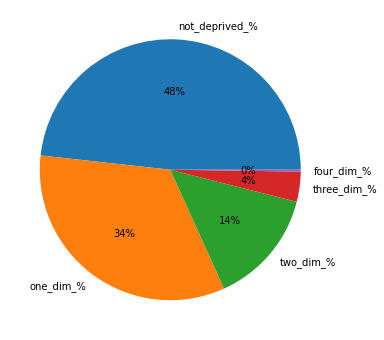

In [26]:
# Average across dimensions of deprivation
plt.figure(figsize=(6,6))
df[['not_deprived_%','one_dim_%','two_dim_%','three_dim_%','four_dim_%']].mean().plot(kind='pie', autopct='%1.0f%%');

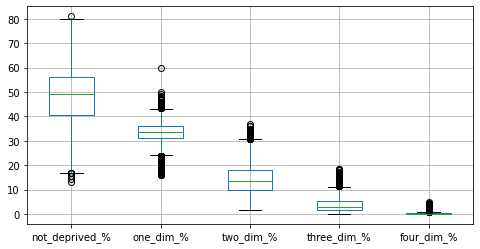

In [27]:
# Variance of deprivation
plt.figure(figsize=(8,4))
df.boxplot(['not_deprived_%','one_dim_%','two_dim_%','three_dim_%','four_dim_%']);

### Specific areas

In [28]:
# Top areas with one deprivation or more
df['deprived_%']= 100-(df['not_deprived_%'])
top = df[['SOA','deprived_%']].sort_values(['deprived_%'],ascending=False).head(10)
top

,SOA,deprived_%
14851,Birmingham 121B,86.7
5604,Liverpool 037G,85.8
8391,Bradford 041D,84.4
18015,Tendring 018A,84.4
14631,Birmingham 071E,83.4
9834,Leicester 018F,83.2
8565,Calderdale 012C,83.2
4309,Oldham 024D,83.2
6637,North East Lincolnshire 002A,83.0
24693,Westminster 009A,82.8


In [29]:
# Top areas with four dimensions of deprivation
four=df[['SOA','four_dim_%']].sort_values(['four_dim_%'],ascending=False).head(10)
four

,SOA,four_dim_%
17815,Harlow 007F,5.1
32179,"Bournemouth, Christchurch and Poole 037F",4.4
23172,Lewisham 020B,4.1
18687,Great Yarmouth 009D,4.0
20097,Barnet 038C,3.9
25726,Brighton and Hove 012E,3.6
21557,Hackney 001A,3.5
20392,Brent 025B,3.5
16255,Luton 021A,3.3
34879,Cardiff 016C,3.3


### Language

In [30]:
df.iloc[:,-10:].describe()

,%_y,all_adults,all_adults_%,one_adult,one_adult_%,3_15y,3_15y_%,none,none_%,deprived_%
count,35672.0,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000
mean,100.0,622.781902,89.487506,29.063944,4.334419,9.247954,1.357589,33.658359,4.821235,51.746213
std,0.0,156.256460,12.228174,33.952587,5.384760,11.528596,1.705627,44.185571,6.122408,10.725164
min,100.0,96.000000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,100.0,528.000000,86.000000,8.000000,1.100000,2.000000,0.200000,5.000000,0.800000,43.700000
50%,100.0,611.000000,94.700000,15.000000,2.200000,5.000000,0.700000,15.000000,2.200000,51.000000
75%,100.0,705.000000,97.800000,37.000000,5.300000,13.000000,1.800000,44.000000,6.500000,59.500000
max,100.0,1959.000000,100.000000,323.000000,54.000000,131.000000,17.300000,373.000000,52.000000,86.700000


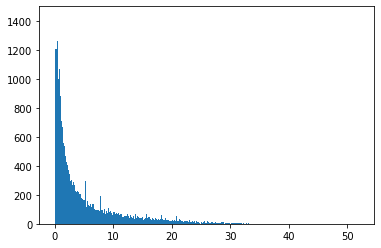

In [31]:
plt.hist(df['none_%'], bins=500);

In [32]:
df[['SOA','none_%']].sort_values(['none_%'],ascending=False).head(10)


,SOA,none_%
9803,Leicester 010F,52.0
9823,Leicester 017B,51.1
9782,Leicester 006C,50.3
9825,Leicester 017D,49.1
9802,Leicester 010E,47.5
9799,Leicester 010B,46.5
9785,Leicester 006G,45.3
8402,Bradford 044A,45.2
9798,Leicester 010A,44.5
9780,Leicester 006A,43.7


### Correlation with language

In [33]:
all_corr=round(df[['not_deprived',
                  'all_adults','one_adult',  '3_15y', 'none'
                  ]].corr(),2)

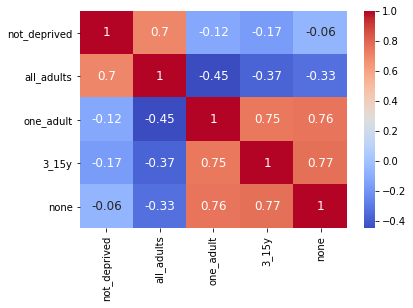

In [34]:
sns.heatmap(all_corr, cmap = "coolwarm", annot = True, annot_kws = {"size":12});

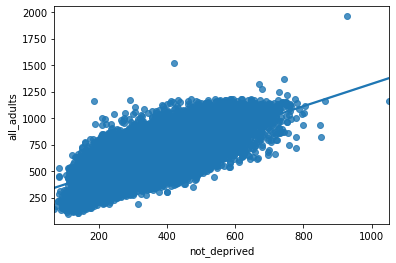

In [35]:
sns.regplot(x='not_deprived', y='all_adults', data=df);

### Language and multiple deprivation

In [36]:
# Map combo of language challenges and multiple dep
def high(df):
    if df['four_dim_%']>0.3 and df['none_%']>6.5:
        return 1
    else:
        return 0

In [37]:
df['high'] = df.apply(lambda x: high(x), axis=1)

In [38]:
df.high.value_counts(normalize=True)

0    0.886802
1    0.113198
Name: high, dtype: float64

In [39]:
# Get geojson
link = 'https://raw.githubusercontent.com/gausie/LSOA-2011-GeoJSON/master/lsoa.geojson'
with urlopen(link) as response:
    lsoa = json.load(response)

In [40]:
# Check the geojson file
lsoa['features'][1]

{'type': 'Feature',
 'properties': {'LSOA11CD': 'E01000002',
  'LSOA11NM': 'City of London 001B',
  'LSOA11NMW': 'City of London 001B'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-0.088129192891958, 51.51941072535515],
    [-0.089291342305669, 51.51751620814438],
    [-0.090119937520299, 51.51747743868171],
    [-0.090309543777312, 51.517079511780395],
    [-0.090806374952983, 51.51726210966067],
    [-0.090686712204769, 51.51753893109585],
    [-0.091419937438604, 51.517647957312676],
    [-0.092415629193345, 51.51583051884264],
    [-0.09403214079283, 51.514093133266066],
    [-0.094779170856772, 51.51423734419467],
    [-0.094692318075172, 51.51452721126716],
    [-0.095227447175914, 51.51459028110654],
    [-0.095034822531143, 51.515277754078255],
    [-0.095481176693778, 51.51544002548301],
    [-0.09494329043704, 51.51658650974418],
    [-0.095933545710406, 51.51675279228684],
    [-0.095083736974574, 51.51823695504633],
    [-0.095294295056143, 51.51892577782024],
   

In [41]:
fig = px.choropleth(df, geojson=lsoa, color="high",
                    locations="id", featureidkey="properties.LSOA11CD",
                    projection="mercator",hover_name='SOA',color_discrete_sequence=['yellow','blue']
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_line_width=0)
fig.show()

## Create choropleth with dropdowns

In [42]:
fig = px.choropleth(df, geojson=lsoa, color="one_dim_%",
                    locations="id", featureidkey="properties.LSOA11CD",
                    projection="mercator",hover_name='SOA',color_continuous_scale=["green", "red"]
                   )
fig.update_geos(fitbounds="locations", visible=False)

button1 =  dict(method = "restyle",
                args = [{'z': [ df["one_dim_%"] ] }],
                label = "One dimension of deprivation")
button2 =  dict(method = "restyle",
                args = [{'z': [ df["two_dim_%"] ]}],
                label = "Two dimensions of deprivation")
button3 =  dict(method = "restyle",
                args = [{'z': [ df["three_dim_%"] ]}],
                label = "Three dimensions of deprivation")
button4 =  dict(method = "restyle",
                args = [{'z': [ df["four_dim_%"] ]}],
                label = "Four dimensions of deprivation")


fig.update_layout(width=700,
                  coloraxis_colorbar_thickness=23,
                  updatemenus=[dict(y=0.9,
                                    x=0.275,
                                    xanchor='right',
                                    yanchor='top',
                                    active=0,
                                    buttons=[button1, button2, button3, button4])
                              ]) 


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    coloraxis_colorbar=dict(
        title="% of households",
    )
)

fig.layout.xaxis.fixedrange = False 
fig.layout.yaxis.fixedrange = False 
fig.update_traces(marker_line_width=0)

fig.show()

## Cluster model

In [43]:
df_pca = df[['not_deprived',
        'one_dim',  'two_dim', 
       'three_dim', 'four_dim', 'all_adults', 
             'one_adult', 
             '3_15y','none']]

In [44]:
pca = PCA()
pca.fit(df_pca)

PCA()

In [45]:
# Access components
W = pca.components_

# Create DF of eigenvalues per feature per PC
W_df = pd.DataFrame(W.T,index=df_pca.columns)

In [46]:
# Project dataset into new space of PCs
X_proj = pca.transform(df_pca)

# PC scores
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 10)])

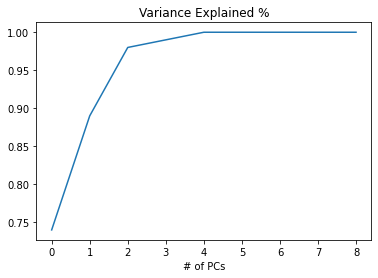

In [47]:
# Identfy variance per PC
var_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
plt.plot(var_cumsum)
plt.title('Variance Explained %')
plt.xlabel('# of PCs')
plt.show()

In [48]:
W_df[0].sort_values(ascending=False)

all_adults      0.855919
not_deprived    0.463817
one_dim         0.202100
two_dim         0.035842
four_dim       -0.000892
three_dim      -0.004958
3_15y          -0.021006
none           -0.066201
one_adult      -0.072785
Name: 0, dtype: float64

In [49]:
# Compress data into 3 dimensions
pca = PCA(n_components=3).fit(df_pca)
X_proj = pd.DataFrame(pca.fit_transform(df_pca), columns=['PC1','PC2','PC3'])

In [50]:
# Cluster DF using KMeans
km = KMeans(n_clusters=3)

# Use PCA projeted DF to optimise KMeans as works best on data that is already clustered
km.fit(X_proj)


KMeans(n_clusters=3)

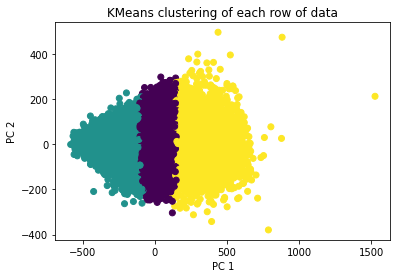

In [51]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering of each row of data'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [52]:
km_df = pd.DataFrame(km.labels_)

In [53]:
# Combine original DF with the KMeans labels
combined = pd.concat([df[['SOA','id','not_deprived_%',
        'one_dim_%',  'two_dim_%', 
       'three_dim_%', 'four_dim_%', 'all_adults_%', 
             'one_adult_%', 
             '3_15y_%','none_%']],km_df], axis = 1)
combined.rename(columns={0:'KM_Label'},inplace=True)
combined.head(2)

,SOA,id,not_deprived_%,one_dim_%,two_dim_%,three_dim_%,four_dim_%,all_adults_%,one_adult_%,3_15y_%,none_%,KM_Label
0,Hartlepool 001A,E01011954,40.4,31.6,21.5,6.4,0.1,98.8,0.3,0.2,0.7,2
1,Hartlepool 001B,E01011969,50.7,33.0,14.8,1.5,0.0,99.5,0.0,0.0,0.5,0


In [54]:
mean = combined.groupby('KM_Label').mean().reset_index()
mean

/var/folders/ck/xg3scjhn503b00cjf3vysm3h0000gn/T/ipykernel_18150/3160385441.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,KM_Label,not_deprived_%,one_dim_%,two_dim_%,three_dim_%,four_dim_%,all_adults_%,one_adult_%,3_15y_%,none_%
0,0,49.019875,33.338029,13.953097,3.493473,0.195070,93.205485,2.751217,0.906224,3.138522
1,1,44.516890,34.367621,16.064938,4.728364,0.324009,79.472097,8.662885,2.632199,9.233771
2,2,51.860818,32.620718,12.443287,2.900757,0.171249,93.936542,2.337540,0.723036,3.001111


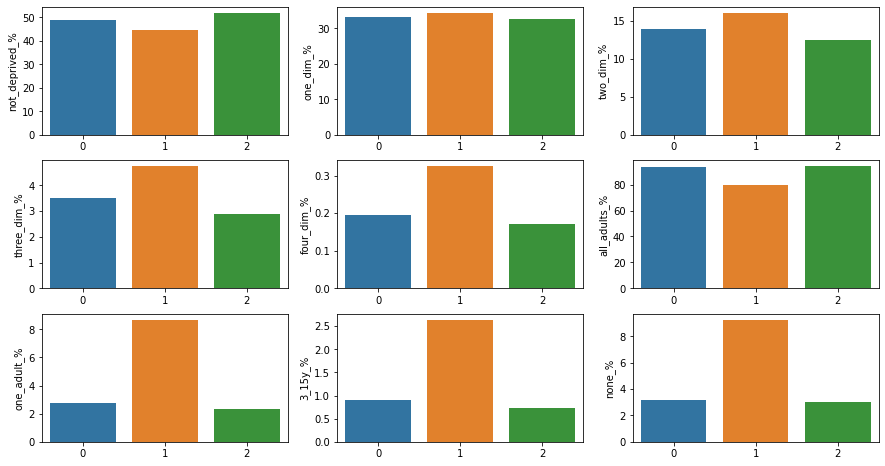

In [55]:
count=1
plt.subplots(figsize=(15, 8))
for c in ['not_deprived_%', 'one_dim_%', 'two_dim_%', 'three_dim_%',
       'four_dim_%', 'all_adults_%', 'one_adult_%', '3_15y_%', 'none_%']:
    plt.subplot(3,3,count)
    sns.barplot(x=mean.index,y=c,data=mean)
    count+=1
    
plt.show()
    

In [56]:
combined.KM_Label.value_counts()

0    19472
1     9988
2     6212
Name: KM_Label, dtype: int64

In [57]:
fig = px.choropleth(combined, geojson=lsoa, color="KM_Label",
                    locations="id", featureidkey="properties.LSOA11CD",
                    projection="mercator",hover_name='SOA',color_discrete_sequence=['yellow','blue']
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_line_width=0)
fig.show()